In [1]:
%load_ext autoreload
%autoreload 2

import anndata as ad
import matplotlib.pyplot as plt

from commando import ComManDo
from commando.utilities import visualize_mapping

2021-11-14 17:31:46.693456: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-14 17:31:46.693491: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Read Data

In [2]:
data_mod1 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_phase1/openproblems_bmmc_multiome_phase1.censor_dataset.output_mod1.h5ad')
data_mod2 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_phase1/openproblems_bmmc_multiome_phase1.censor_dataset.output_mod2.h5ad')

# data_mod1 = ad.read_h5ad('OPSCA/openproblems_bmmc_cite_phase1/openproblems_bmmc_cite_phase1.censor_dataset.output_mod1.h5ad')
# data_mod2 = ad.read_h5ad('OPSCA/openproblems_bmmc_cite_phase1/openproblems_bmmc_cite_phase1.censor_dataset.output_mod2.h5ad')

In [3]:
X1 = data_mod1.X
X2 = data_mod2.X

# Run Mapping

In [4]:
commando_out = (
    ComManDo(
        distance_mode='spearman',
        two_step_aggregation = 'random',
        # epoch_pd=1,
        # two_step_pd_large=1,
        epoch_pd=500,
        # two_step_pd_large=1000,
        two_step_include_large=False,
        log_pd=500,
        two_step_num_partitions=141,
        two_step_redundancy=2,
    )
    .fit_transform([X1, X2])
)

use random seed: 666

Beginning redundant step 1
Two-Step group sizes
Min: 159
Max: 160
Shape of Raw data
Dataset 0: (22463, 13431)
Dataset 1: (22463, 116490)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 1
Calculating intra-group F #14
epoch:[500/500] err:0.0383 alpha:0.9559
Calculating intra-group F #28
epoch:[500/500] err:0.0387 alpha:0.9559
Calculating intra-group F #42
epoch:[500/500] err:0.0400 alpha:0.9552
Calculating intra-group F #56
epoch:[500/500] err:0.0390 alpha:0.9556
Calculating intra-group F #70
epoch:[500/500] err:0.0393 alpha:0.9554
Calculating intra-group F #84
epoch:[500/500] err:0.0392 alpha:0.9555
Calculating intra-group F #98
epoch:[500/500] err:0.0399 alpha:0.9552
Calculating intra-group F #112
epoch:[500/500] err:0.0389 alpha:0.9558
Calculating intra-group F #126
epoch:[500/500] err:0.0389 alpha:0.9555
Calculating intra-group F #140
epoch:[500/500] err:0.0387 alpha:0.9557
---------------------------------
Find c

# Evaluate

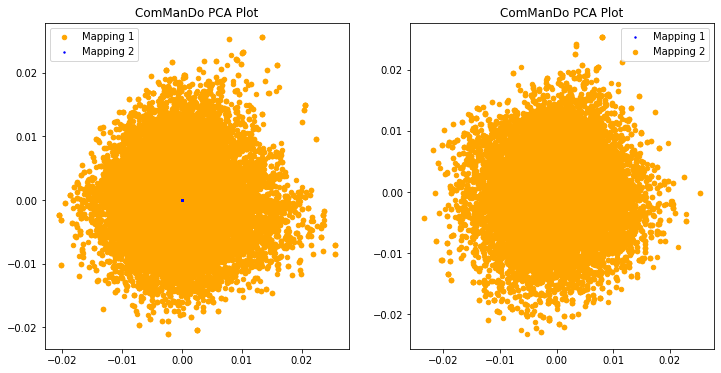

In [5]:
plt.subplots(figsize=(12, 6))
plt.subplot(1, 2, 1)
visualize_mapping(commando_out, 0)
plt.subplot(1, 2, 2)
visualize_mapping(commando_out, 1)